In [1]:
import importlib
import gptree
importlib.reload(gptree)
from gptree import *
from funcs import *
import numpy as np
import random
import gp
importlib.reload(gp)
from gp import *


In [3]:
def target_func(x): # evolution's target
    return x*x*x*x + x*x*x + x*x + x + 1

def generate_dataset(): # generate 101 data points from target_func
    x_list, y_list = [], []
    for x in range(-100,101,2): 
        x /= 100
        x_list.append(x)
        y_list.append(target_func(x))
    return np.array(x_list), np.array(y_list)

x, y = generate_dataset()

In [4]:
gp = GP(func_list=['add','mul','sub'], depth_penalty=0.005)
res = gp.execute(x,y, generations=50)
res

{'total_generations': 50,
 'best_fitness': array([0.44652114, 0.44652114, 0.39605157, 0.39394737, 0.22975318,
        0.22975318, 0.22975318, 0.22975318, 0.16962932, 0.16962932,
        0.16962932, 0.16962932, 0.16962932, 0.16962932, 0.14482414,
        0.14482414, 0.11815054, 0.11815054, 0.09564608, 0.06959731,
        0.06959731, 0.06959731, 0.06023093, 0.06023093, 0.06023093,
        0.05280441, 0.05280441, 0.05280441, 0.03745412, 0.03745412,
        0.0303378 , 0.0303378 , 0.0303378 , 0.01795604, 0.01795604,
        0.01795604, 0.01795604, 0.01353107, 0.01353107, 0.01353107,
        0.01353107, 0.01353107, 0.01353107, 0.01353107, 0.01353107,
        0.01353107, 0.01094846, 0.01094846, 0.01070719, 0.01070719,
        0.01070719]),
 'best_trees': array([Node(sub), Node(sub), Node(add), Node(add), Node(add), Node(add),
        Node(add), Node(add), Node(add), Node(add), Node(add), Node(add),
        Node(add), Node(add), Node(add), Node(add), Node(add), Node(add),
        Node(add), N

add( sub( 0.2952801041923916 add( mul( -0.624139509898952 add( mul( x 0.5792269840929951 ) 0.5792269840929951 ) ) sub( mul( sub( sub( mul( x 0.5792269840929951 ) x ) add( x add( -0.6108761438072075 mul( add( 0.5792269840929951 x ) mul( add( add( mul( x 0.5792269840929951 ) 0.5792269840929951 ) x ) add( mul( x 0.5792269840929951 ) 0.5614627377054815 ) ) ) ) ) ) add( -0.7960526054422072 x ) ) x ) ) ) add( x x ) )


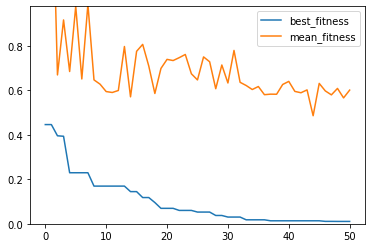

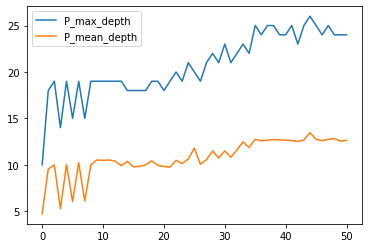

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.plot(res['mean_fitness'], label='mean_fitness')
plt.ylim(0,res['mean_fitness'][5])
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['P_max_depth'], label='P_max_depth')
plt.plot(res['P_mean_depth'], label='P_mean_depth')
plt.legend()
print(res['best_trees'][-1])

In [2]:
nroot = GPTree('add', 
    left=GPTree('mul',
        left=GPTree(3),
        right=GPTree('x')), 
    right=GPTree('inv', 
        left=GPTree(0.5)))
nroot2 = GPTree('mul',
        left=GPTree(3),
        right=GPTree('x')) 
    

In [9]:
np.asarray([tree.depth() for tree in [nroot,nroot2]])

array([2, 1])

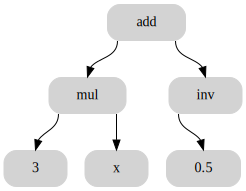

In [3]:
nroot.graphviz()

In [55]:
from sys import getsizeof
treelist = [nroot, nroot] # para probar, lista de trees con mismo size
print(getsizeof(nroot)) # este arbol ocupa 48 bytes

arr = np.array([nroot, nroot], dtype=object) # si lo hacemos como se haria normalmente sale mal
print('Np.array mal:')
print(arr) # coge cada arbol como lista de nodos y lo estira fila a fila
print(arr.shape, arr.size) # 2 dimensional, muchos mas elementos
print(arr.itemsize, arr.nbytes) # como guarda punteros cada el. son 8 bytes, pero guarda mas
print(getsizeof(arr)) # la np.array acaba ocupando mucho mas

arr2 = np.ndarray(2, dtype=GPTree) # asi lo creamos vacio
arr2[:] = treelist # y luego lo llenamos
print('Np.array creando vacia y luego asignando:')
print(arr2) 
print(arr2.shape, arr2.size) # dimensiones y num de elementos bien, las dos raices
print(arr2.itemsize, arr2.nbytes) # el tam por item es el mismo al ser punteros, pero solo cogiendo raices
print(getsizeof(arr2)) # ocupa en total mucho menos espacio

arr3 = np.fromiter(treelist, dtype=GPTree) # o podemos hacer esto y ya esta, 1 linea easy
print('Np.array tomando de iterador (lista)')
print(arr3) # todo esto igual que el de arriba
print(arr3.shape, arr3.size)
print(arr3.itemsize, arr3.nbytes) 
print(getsizeof(arr3))

48
Np.array mal:
[[Node(add) Node(mul) Node(inv) Node(3) Node(x) Node(0.5)]
 [Node(add) Node(mul) Node(inv) Node(3) Node(x) Node(0.5)]]
(2, 6) 12
8 96
224
Np.array creando vacia y luego asignando:
[Node(add) Node(add)]
(2,) 2
8 16
128
Np.array tomando de iterador (lista)
[Node(add) Node(add)]
(2,) 2
8 16
128


In [59]:
def softcast(P):
	pop_casted=np.empty(len(P),dtype=object)
	pop_casted[:]=P[:]

In [6]:
import time
P = [nroot]*100
N = 100000
time_2_start = time.time()
for i in range(N):
    arr2 = softcast(P)
time_2_end = time.time()
print((time_2_end-time_2_start)/N)

time_3_start = time.time()
for i in range(N):
    arr3 = np.fromiter(P, dtype=GPTree)
time_3_end = time.time()
print((time_3_end-time_3_start)/N)

1.370072603225708e-06
1.3078539371490478e-06


In [22]:
MAX_DEPTH=3
MIN_DEPTH=2
PROB_SYMBOL=0.5

def random_terminal():
	if random.random()<PROB_SYMBOL:
		return SYMBOL
	else:
		return 5*random.random()
		
def gen_tree(depth=0):
	if depth<MIN_DEPTH:
		if depth==0:
			n1 = GPTree(random.choice(FUNC_AR2_LIST))
		else:
			n1 = GPTree(random.choice(FUNC_LIST))
	elif depth>=MAX_DEPTH:
		n1 = GPTree(random_terminal())
	else:
		if random.random()<0.5:
			n1 = GPTree(random.choice(FUNC_LIST))
		else:
			n1 = GPTree(random_terminal())
	if n1.is_func():
		n1.left=gen_tree(depth+1)
		if n1.arity()==2:
			n1.right=gen_tree(depth+1)
	return n1		
n1, n2 = gen_tree(), gen_tree()
n1.pprint()
n2.pprint()


                       _________________________add________________________
                      /                                                    \
                   _mul_____________________                              _add____________________
                  /                         \                            /                        \
         _______inv                _________inv               _________inv               _________mul
        /                         /                          /                          /            \
3.2510915228502         0.11328550004494287         3.5055644120404454         0.7421924941812785     x


                            ___________________sub__________________________________________
                           /                                                                \
                      ___add________                                    ____________________inv
                     /              \                

In [51]:
def crossover(tree1,tree2):
	node1=np.random.choice(tree1.preorder[1:])
	node2=np.random.choice(tree2.preorder[1:])
	
	node1.val,node2.val=node2.val,node1.val
	node1.right,node2.right=node2.right,node1.right
	node1.left,node2.left=node2.left,node1.left
	return tree1,tree2
n1_x, n2_x = crossover(n1, n2)
n1_x.pprint()
n2_x.pprint()


          _________add__________________________________________________
         /                                                              \
0.7421924941812785                                                     _add______________________________________________________________________________
                                                                      /                                                                                  \
                                                                   _inv                            ______________________________________________________add________
                                                                  /                               /                                                                 \
                                            ____________________inv                            _sub________________________________________________          0.450276073260939
                                     